In [219]:
! pip3 install pmdarima


DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 604.0/604.0 kB 12.7 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 38.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.0/307.0 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 986.3/986.3 kB 20.5 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 MB 17.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 37.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.7/233.7 kB 8.8 MB/s eta 0:00:00
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If y

In [220]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers.recurrent import LSTM,GRU
from tensorflow.keras import Input
from pmdarima.arima import auto_arima

In [180]:
df = pd.read_csv('./processed_data.csv')
print(len(df))

1085


In [181]:
df.head()

,Date,Adj Close,Volume,timestamp,Log Returns,Rank,Adj Rank
0,2018-01-01,3373.688232,0,1514786400,0.000000,842,6.735780
1,2018-01-02,3373.688232,0,1514872800,0.000000,842,6.735780
2,2018-01-03,3373.688232,0,1514959200,0.000000,842,6.735780
3,2018-01-04,3355.286133,11400,1515045600,0.005470,872,6.770789
4,2018-01-05,3382.888916,10800,1515132000,-0.008193,872,6.770789


In [182]:
look_back = 7
def create_dataset(closing_price, op_scores):
    dataX, dataY = [], []
    for i in range(len(closing_price)-look_back-1):
#         print(closing_price[i:i+look_back].shape, op_scores[i:i+look_back].shape)
        a = np.vstack([closing_price[i:i+look_back], op_scores[i:i+look_back]]).T
        dataX.append(a)
        dataY.append(closing_price[i + look_back])
    return np.array(dataX), np.array(dataY)

log_return, rank = 1000*np.array(df["Log Returns"]), np.array(df["Adj Rank"])
multiX, dataY = create_dataset(log_return, rank)

singleX = multiX[:,:,0:1]

train_count = 900

multiX_train, multiX_test = multiX[:train_count], multiX[train_count:]
singleX_train, singleX_test = singleX[:train_count], singleX[train_count:]
dataY_train, dataY_test = dataY[:train_count], dataY[train_count:]

print(singleX_train.shape, singleX_train.shape, dataY_train.shape)

(900, 7, 1) (900, 7, 1) (900,)


In [200]:
multiModel = Sequential()
multiModel.add(GRU(16, input_shape=(multiX.shape[1], multiX.shape[2])))
multiModel.add(Dense(1))
multiModel.compile(loss='mse', optimizer='adam')

singleModel = Sequential()
singleModel.add(GRU(16, input_shape=(singleX.shape[1], singleX.shape[2])))
# singleModel.add(Dense(64, activation="relu"))
singleModel.add(Dense(1))
singleModel.compile(loss='mse', optimizer='adam')

In [209]:
multiModel.fit(multiX_train, dataY_train, validation_data=(multiX_test, dataY_test), batch_size=16, epochs=100)

Epoch 1/100
57/57 [==============================] - 2s 9ms/step - loss: 489.6080 - val_loss: 1578.1693
Epoch 2/100
57/57 [==============================] - 0s 5ms/step - loss: 487.6700 - val_loss: 1581.0225
Epoch 3/100
57/57 [==============================] - 0s 5ms/step - loss: 486.5326 - val_loss: 1581.8679
Epoch 4/100
57/57 [==============================] - 0s 5ms/step - loss: 485.8405 - val_loss: 1582.0011
Epoch 5/100
57/57 [==============================] - 0s 5ms/step - loss: 485.5513 - val_loss: 1581.8568
Epoch 6/100
57/57 [==============================] - 0s 5ms/step - loss: 484.9478 - val_loss: 1581.9592
Epoch 7/100
57/57 [==============================] - 0s 5ms/step - loss: 484.7437 - val_loss: 1582.2916
Epoch 8/100
57/57 [==============================] - 0s 5ms/step - loss: 484.3125 - val_loss: 1581.6139
Epoch 9/100
57/57 [==============================] - 0s 5ms/step - loss: 483.9579 - val_loss: 1580.7906
Epoch 10/100
57/57 [==============================] - 0s 5ms/ste

57/57 [==============================] - 0s 5ms/step - loss: 352.7910 - val_loss: 1594.6035
Epoch 80/100
57/57 [==============================] - 0s 5ms/step - loss: 348.2085 - val_loss: 1587.8113
Epoch 81/100
57/57 [==============================] - 0s 5ms/step - loss: 347.6464 - val_loss: 1579.5261
Epoch 82/100
57/57 [==============================] - 0s 5ms/step - loss: 342.1355 - val_loss: 1578.9688
Epoch 83/100
57/57 [==============================] - 0s 5ms/step - loss: 338.5023 - val_loss: 1592.3967
Epoch 84/100
57/57 [==============================] - 0s 5ms/step - loss: 334.9272 - val_loss: 1591.7515
Epoch 85/100
57/57 [==============================] - 0s 5ms/step - loss: 333.5771 - val_loss: 1576.5266
Epoch 86/100
57/57 [==============================] - 0s 5ms/step - loss: 330.0070 - val_loss: 1593.0818
Epoch 87/100
57/57 [==============================] - 0s 5ms/step - loss: 324.9966 - val_loss: 1585.8605
Epoch 88/100
57/57 [==============================] - 0s 5ms/step - 

In [202]:
singleModel.fit(singleX_train, dataY_train, validation_data=(singleX_test, dataY_test), batch_size=16, epochs=100)

Epoch 1/100
57/57 [==============================] - 0s 5ms/step - loss: 458.2847 - val_loss: 1551.1274
Epoch 2/100
57/57 [==============================] - 0s 4ms/step - loss: 457.3587 - val_loss: 1551.6160
Epoch 3/100
57/57 [==============================] - 0s 4ms/step - loss: 456.9270 - val_loss: 1551.5879
Epoch 4/100
57/57 [==============================] - 0s 4ms/step - loss: 456.2690 - val_loss: 1551.6328
Epoch 5/100
57/57 [==============================] - 0s 4ms/step - loss: 455.9979 - val_loss: 1551.0068
Epoch 6/100
57/57 [==============================] - 0s 4ms/step - loss: 455.1734 - val_loss: 1550.6582
Epoch 7/100
57/57 [==============================] - 0s 4ms/step - loss: 454.4104 - val_loss: 1551.4691
Epoch 8/100
57/57 [==============================] - 0s 4ms/step - loss: 453.7563 - val_loss: 1551.1301
Epoch 9/100
57/57 [==============================] - 0s 4ms/step - loss: 453.0933 - val_loss: 1553.7571
Epoch 10/100
57/57 [==============================] - 0s 4ms/ste

57/57 [==============================] - 0s 4ms/step - loss: 409.4253 - val_loss: 1550.7491
Epoch 80/100
57/57 [==============================] - 0s 4ms/step - loss: 408.9631 - val_loss: 1551.5966
Epoch 81/100
57/57 [==============================] - 0s 5ms/step - loss: 408.0659 - val_loss: 1550.2734
Epoch 82/100
57/57 [==============================] - 0s 4ms/step - loss: 408.1877 - val_loss: 1551.2600
Epoch 83/100
57/57 [==============================] - 0s 4ms/step - loss: 406.6800 - val_loss: 1550.1475
Epoch 84/100
57/57 [==============================] - 0s 4ms/step - loss: 406.2725 - val_loss: 1550.6340
Epoch 85/100
57/57 [==============================] - 0s 4ms/step - loss: 405.7946 - val_loss: 1555.4991
Epoch 86/100
57/57 [==============================] - 0s 4ms/step - loss: 405.2224 - val_loss: 1550.2010
Epoch 87/100
57/57 [==============================] - 0s 4ms/step - loss: 404.6037 - val_loss: 1552.0897
Epoch 88/100
57/57 [==============================] - 0s 4ms/step - 

In [210]:
df = pd.read_csv('./processed_data.csv')
df = df[:-look_back-1]


In [212]:
print(singleX.shape)
print(singleModel.predict(singleX).shape)
df["single_predict"]=singleModel.predict(singleX)/1000
df["multi_predict"]=multiModel.predict(multiX)/1000

(1077, 7, 1)
34/34 [==============================] - 0s 1ms/step
(1077, 1)
34/34 [==============================] - 0s 1ms/step


<AxesSubplot:>

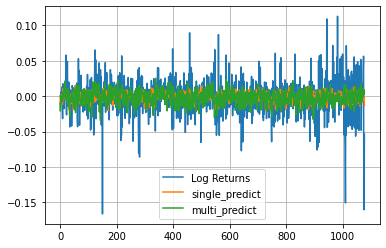

In [214]:
df.plot(y=["Log Returns", "single_predict", "multi_predict"], grid=True)

In [206]:
df.head()

,Date,Adj Close,Volume,timestamp,Log Returns,Rank,Adj Rank,single_predict
0,2018-01-01,3373.688232,0,1514786400,0.000000,842,6.735780,-0.000033
1,2018-01-02,3373.688232,0,1514872800,0.000000,842,6.735780,-0.011504
2,2018-01-03,3373.688232,0,1514959200,0.000000,842,6.735780,-0.010600
3,2018-01-04,3355.286133,11400,1515045600,0.005470,872,6.770789,-0.002155
4,2018-01-05,3382.888916,10800,1515132000,-0.008193,872,6.770789,-0.010179


In [216]:
def sign_score(listA, listB):
    if len(listA) != len(listB):
        raise "Lists must be the same length"
    return np.sum(np.where(listA*listB>0,1,0))/len(listA)
sign_score(df["Log Returns"].to_numpy(), df["single_predict"].to_numpy())

0.5153203342618384

In [217]:
sign_score(df["Log Returns"].to_numpy(), df["multi_predict"].to_numpy())

0.48003714020427113